# SMI experiments

- [ ] From ACL papers, CNN News, Legal Cases,
- [ ] Use GMM to find the distribution of key words (or other model with explicit structure (i.e. Introduction and Conclusion in ACL papers)) 
- [ ] See the truncated position of Introduction and Conclusion in scientific paper corpus

In [2]:
import sys
sys.path.append("..")

In [3]:
import corpus
import tokenizer

paper_items = corpus.read_paper_corpus(200)
cnn_items = corpus.read_cnn_corpus(200)
legal_items = corpus.read_legal_corpus(200)

legal-corpus: 100%|██████████| 200/200 [00:01<00:00, 191.62it/s]


In [4]:
import math
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

def mean(lst):
    return sum(lst) / len(lst)

def get_key_distribution(sentences, key_words, scatter=True, prop=True):
    key_words = set(key_words)
    distributions  = [[] for _ in range(100)]

    last_pos = 0
    for i, words in enumerate(sentences, 1):
        pos =  math.ceil(i * 100 / len(sentences))
        if prop:
            dist = len(set(words) & key_words) / len(words)
        else:
            dist = len(set(words) & key_words)

        if len(sentences) < 100:
            for p in range(last_pos, pos):
                distributions[p].append(dist)
            last_pos = pos
        else:
            distributions[pos - 1].append(dist)
    return distributions

def get_items_distribution(items, abstract_remove_stop=True, text_remove_stop=True, proportion=False):
    all_distributions = [[] for _ in range(100)]
    for item in items:
        abstract, introduction, section, conclusion = item
        text = introduction + section + conclusion
        key_words = list(itertools.chain(*tokenizer.tokenize_sentences_and_words(abstract.lower(), remove_stop=abstract_remove_stop)))

        sentences = tokenizer.tokenize_sentences_and_words(text.lower(), remove_stop=text_remove_stop)

        distribution = get_key_distribution(sentences, key_words, prop=proportion)
        distribution = [mean(dist) for dist in distribution]

        for i, value in enumerate(distribution):
            all_distributions[i].append(value)
    
    all_distributions = [mean(dist) for dist in all_distributions]

    return all_distributions

def plot_items_distribution(items, title, *args, **kwargs):
    distribution = get_items_distribution(items, *args, **kwargs)

    fig = plt.figure(figsize=(10, 5))
    axis = fig.add_subplot(1, 1, 1)
    axis.set_title(title)
    
    axis.xlabel("frequency")
    axis.ylabel("position percentage")

    # for pos, color in zip(pos_names, ["green", "brown", "blue"]):
    # sns.distplot(props, label="test", rug=False, hist=False, color="green", ax=axis)
    plt.bar(range(100), distribution)
    axis.legend(fontsize="xx-large")

    plt.show()

def plot_items_distribution_all(items):


    fig = plt.figure(figsize=(30, 15))

    for i, *args in enumerate(itertools.product((True, False), (True, False), (True, False)), 1):
        args = args[0]
        (abstract_remove_stop, text_remove_stop, proportion) = args
        axis = plt.subplot(2, 4, i)
        axis.set_title(f"ab_rs{abstract_remove_stop},txt_rs{text_remove_stop},prop{proportion}")

        distribution = get_items_distribution(items, *args)
        plt.bar(range(100), distribution)
        # axis.legend(fontsize="xx-large")

    plt.show()

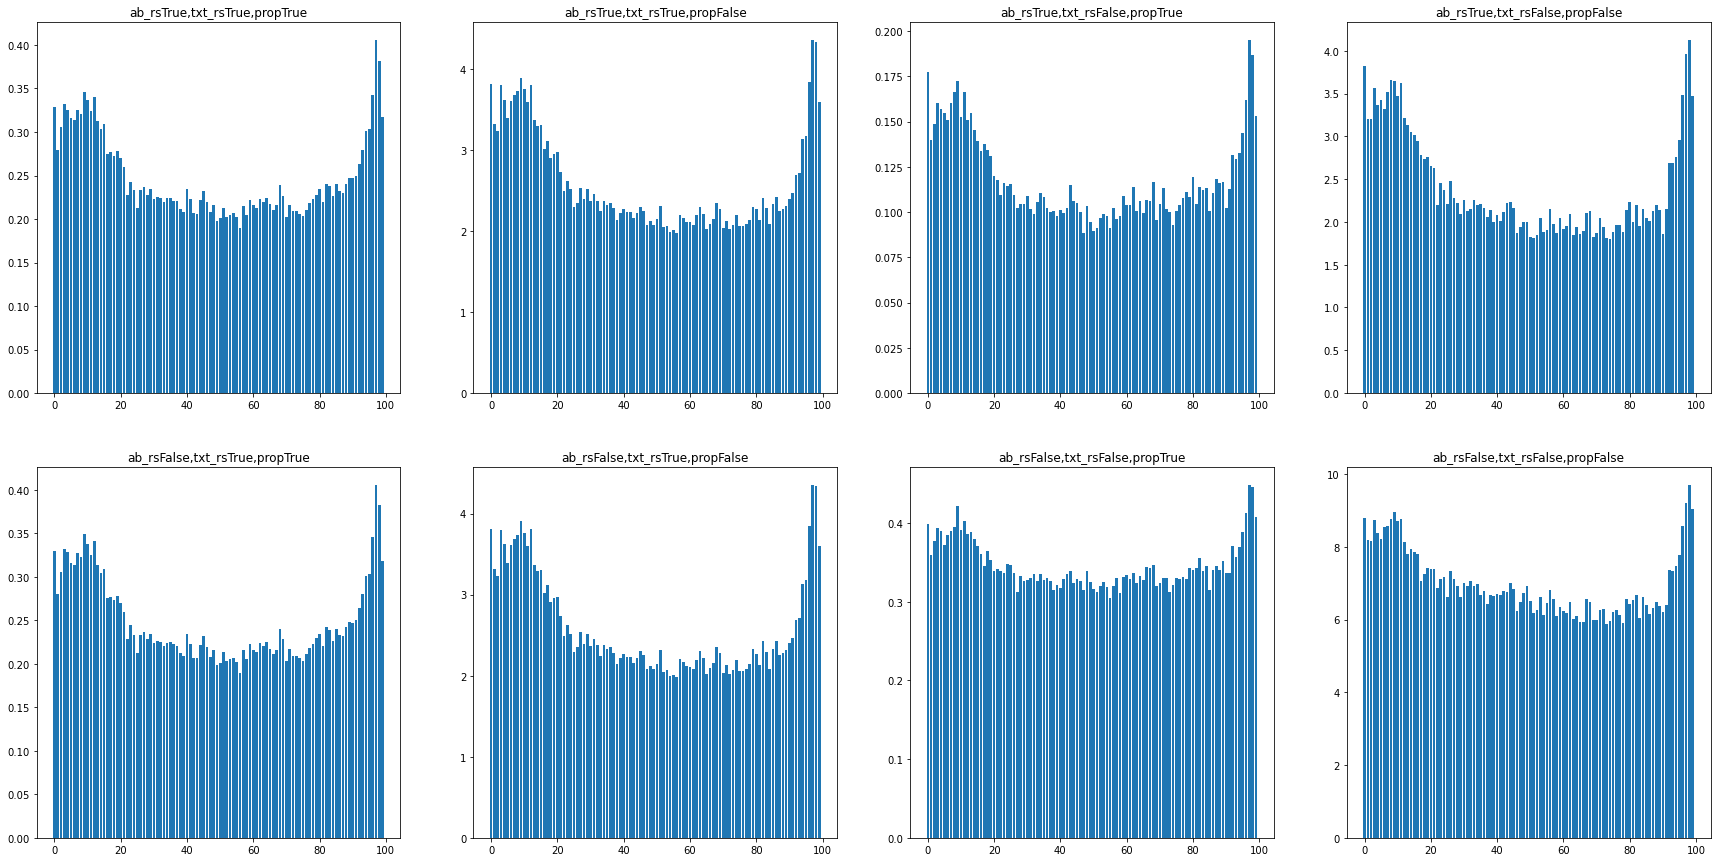

In [31]:
plot_items_distribution_all(paper_items)

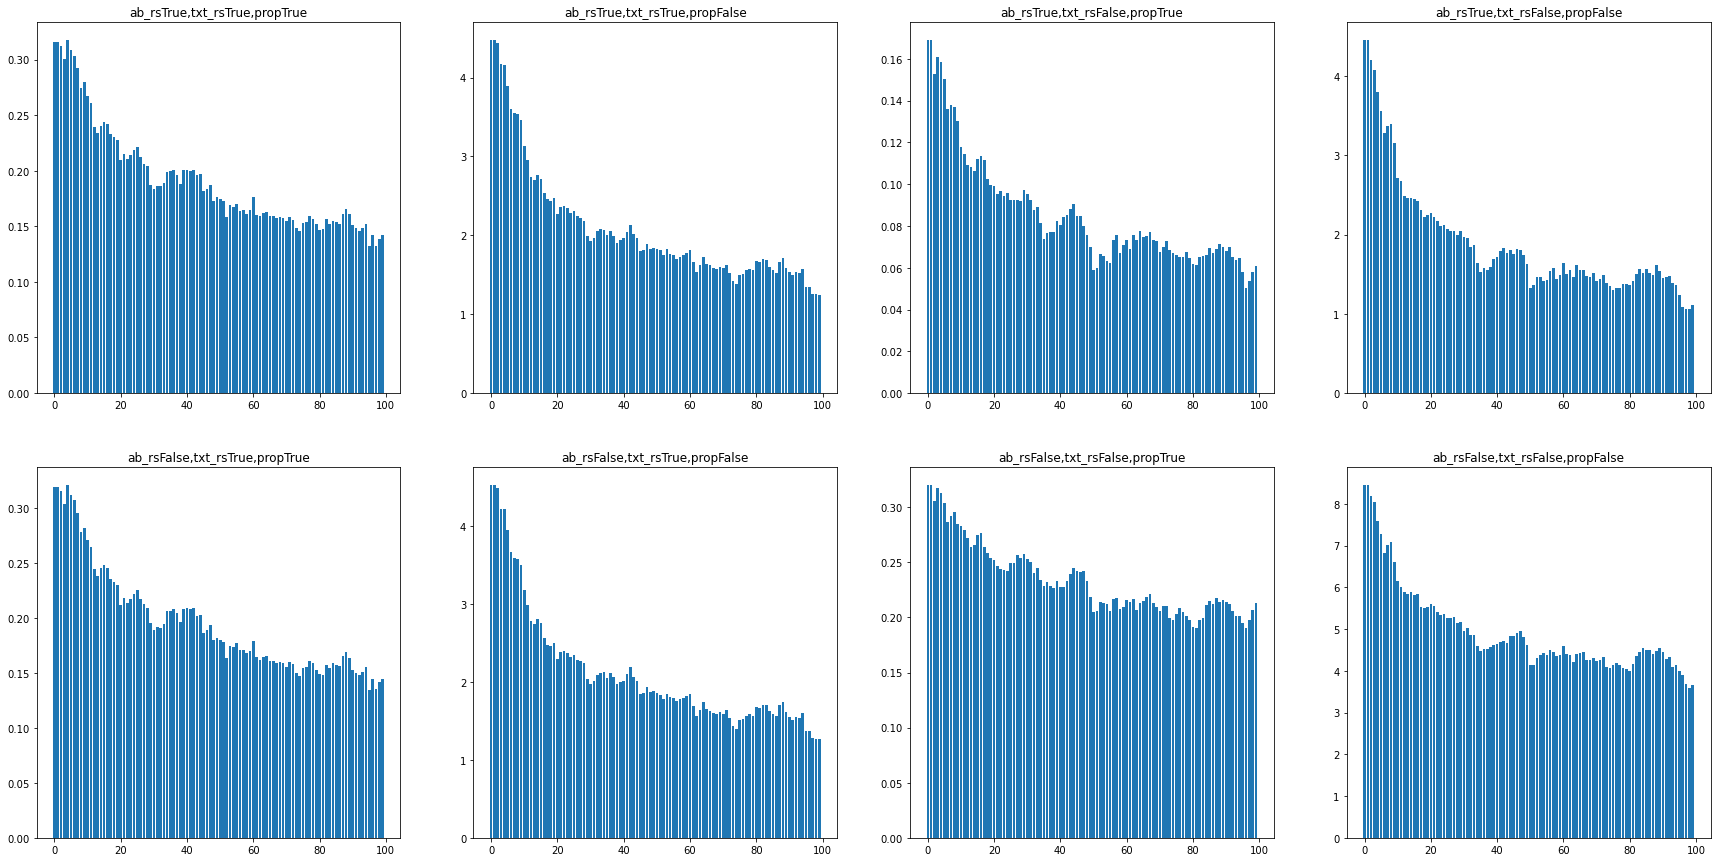

In [30]:
plot_items_distribution_all(cnn_items)

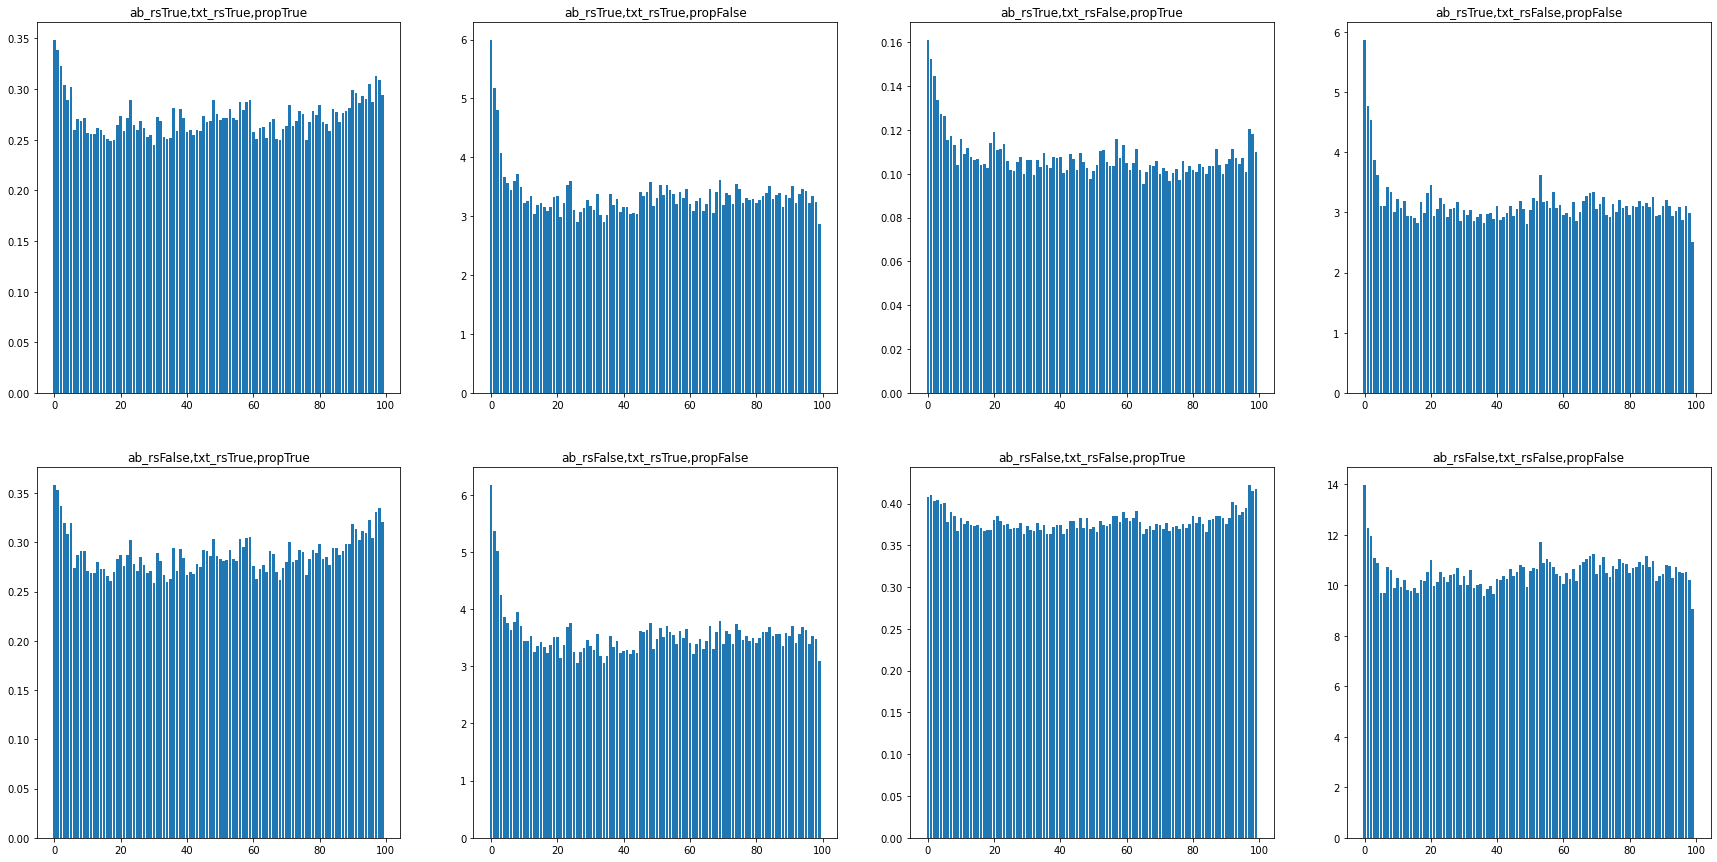

In [32]:
plot_items_distribution_all(legal_items)

No handles with labels found to put in legend.


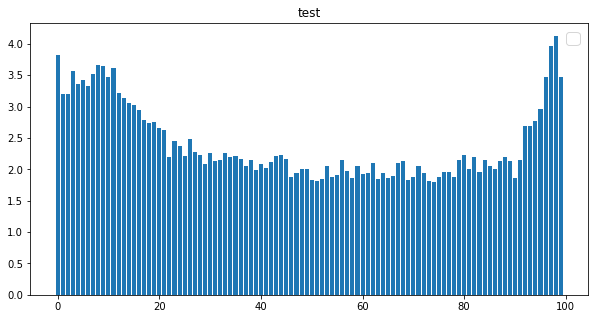

In [5]:
plot_items_distribution(paper_items, abstract_remove_stop=True, text_remove_stop=False, proportion=False)

No handles with labels found to put in legend.


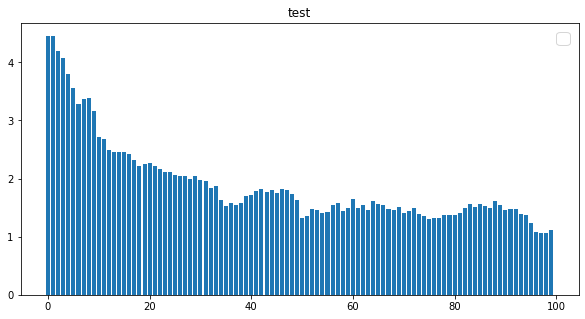

In [6]:
plot_items_distribution(cnn_items, abstract_remove_stop=True, text_remove_stop=False, proportion=False)

No handles with labels found to put in legend.


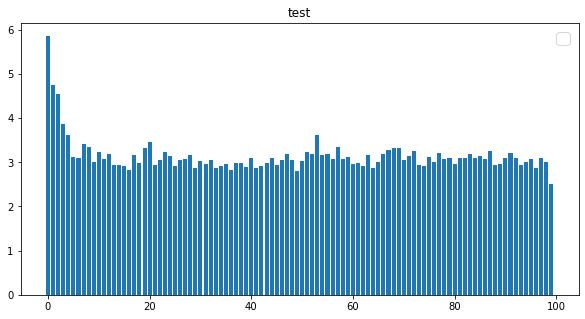

In [7]:
plot_items_distribution(legal_items, abstract_remove_stop=True, text_remove_stop=False, proportion=False)

In [140]:
def get_key_distribution(sentences, key_words, scatter=True, prop=True):
    key_words = set(key_words)
    distributions  = [[] for _ in range(100)]

    last_pos = 0
    for i, words in enumerate(sentences, 1):
        pos =  math.ceil(i * 100 / len(sentences))
        if prop:
            dist = len(set(words) & key_words) / len(words)
        else:
            dist = len(set(words) & key_words)

        if len(sentences) < 100:
            for p in range(last_pos, pos):
                distributions[p].append(dist)
            last_pos = pos
        else:
            distributions[pos - 1].append(dist)
    return distributions

No handles with labels found to put in legend.


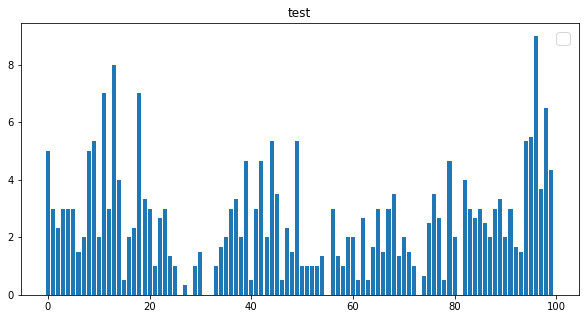

In [142]:
import math
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

def mean(lst):
    return sum(lst) / len(lst)

def get_items_proportion(items):
    all_distributions = [[] for _ in range(100)]
    for item in items:
        key_words = list(itertools.chain(*tokenizer.tokenize_sentences_and_words(abstract.lower(), remove_stop=True)))
        distribution = get_key_distribution(tokenizer.tokenize_sentences_and_words(text.lower(), remove_stop=False), key_words, prop=False)
        distribution = [mean(dist) for dist in distribution]

        for i, value in enumerate(distribution):
            all_distributions[i].append(value)
    
    all_distributions = [mean(dist) for dist in all_distributions]

    return all_distributions

distribution = get_items_proportion(items)

fig = plt.figure(figsize=(10, 5))
axis = fig.add_subplot(1, 1, 1)
axis.set_title("test")

# for pos, color in zip(pos_names, ["green", "brown", "blue"]):
# sns.distplot(props, label="test", rug=False, hist=False, color="green", ax=axis)
plt.bar(range(100), distribution)
axis.legend(fontsize="xx-large")

plt.show()